- rimozione outlier
- rimozione errori (-1 su delta) --> NaN
- controllare che non ci siano righe con valori completmente nulli
- rimozione cobbled, gravel perchè sono tutti true e false
- rimuovere i ciclisti dal dataframe dei ciclisti che non hanno partecipato a gare ???
- rimozione delle feature correlate 
- drop temperatura

Columns containing null values in the cyclist dataset:
- birth_year
- weight
- height


Outliers in cyclist dataset:
- weight
- height

Columns containing null values in the races dataset:
- points
- uci_points
- climb_total
- profile
- cyclist age
- cyclist_team



Outliers in races dataset:
- points
- uci_points
- length
- climb_total
- start_list quality
- race_year
- cyclist_age
- delta







Duplicates in races dataset:
- cyclists
- 

Inconsistencies:
- cyclist_age
- delta

# Data Cleaning

In [1720]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Elimination

In this section we remove entries from both the datasets according to some criteria we define below.

As we noticed in the DU part, there are some cyclists in ```cyclists.csv``` which did not appear in ```races.csv``` i.e. we have a group of cyclists who did not participated to any races.
Since they are not useful we decided to eliminate them. 

TODO: review the reason why we remove the entries.

In [1721]:
cyclists_df = pd.read_csv('../dataset/cyclists.csv')
races_df = pd.read_csv('../dataset/races.csv')

In [1722]:
# Identify cyclists who did not participate in races
cyclists_not_in_races = np.setdiff1d(cyclists_df['_url'].unique(), races_df['cyclist'].unique())

initial_cyclists_count = len(cyclists_df)

# Remove cyclists who did not participate
cyclists_df = cyclists_df[~cyclists_df['_url'].isin(cyclists_not_in_races)]

removed_cyclists_count = initial_cyclists_count - len(cyclists_df)

print(f"Occurrences of cyclists removed: {removed_cyclists_count}")

Occurrences of cyclists removed: 39


## Cyclists Dataset

### Casting

We force the correct type for the ```cyclists.csv``` dataset attributes.

Before the casting types are:

In [1723]:
cyclists_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6095 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6095 non-null   object 
 1   name         6095 non-null   object 
 2   birth_year   6082 non-null   float64
 3   weight       3062 non-null   float64
 4   height       3127 non-null   float64
 5   nationality  6094 non-null   object 
dtypes: float64(3), object(3)
memory usage: 333.3+ KB


We perform the casting:

In [1724]:
# Cast _url, name, and nationality to string
cyclists_df['_url'] = cyclists_df['_url'].astype("string")
cyclists_df['name'] = cyclists_df['name'].astype("string")
cyclists_df['nationality'] = cyclists_df['nationality'].astype("string")

In [1725]:
# Cast birth_year to int (more easy to manipulate)
cyclists_df['birth_year'] = cyclists_df['birth_year'].astype('Int64')

Check if the types are now correct:

In [1726]:
cyclists_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6095 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6095 non-null   string 
 1   name         6095 non-null   string 
 2   birth_year   6082 non-null   Int64  
 3   weight       3062 non-null   float64
 4   height       3127 non-null   float64
 5   nationality  6094 non-null   string 
dtypes: Int64(1), float64(2), string(3)
memory usage: 339.3 KB


### Null Values

In [1727]:
cyclists_df[cyclists_df['birth_year'].isnull()]


,_url,name,birth_year,weight,height,nationality
9,scott-davies,Scott Davies,<NA>,NaN,NaN,<NA>
601,vladimir-malakov,Vladimir Malakov,<NA>,NaN,NaN,Russia
894,antonio-zanini,Antonio Zanini,<NA>,NaN,NaN,Italy
2408,filippo-simonetti,Filippo Simonetti,<NA>,NaN,NaN,Italy
2515,carlos-garcia,Carlos García,<NA>,NaN,NaN,Spain
2536,alexandr-osipov,Alexandr Osipov,<NA>,NaN,NaN,Russia
3046,nicolai-kosyakov,Nicolai Kosyakov,<NA>,NaN,NaN,Russia
3551,nevens-guy,Guy Nevens,<NA>,NaN,NaN,Belgium
4142,oscar-pumar,Oscar Pumar,<NA>,NaN,NaN,Venezuela
4384,javier-luquin,Javier Luquin,<NA>,NaN,NaN,Spain


As there are very few entries, we impute the missing values for the birthday by doing an online search (see the report for the complete list of sources used).

In [1728]:
cyclists_df.loc[cyclists_df['_url'] == 'scott-davies', 'birth_year'] = 1995
cyclists_df.loc[cyclists_df['_url'] == 'vladimir-malakov', 'birth_year'] = 1958 # no weight, height
cyclists_df.loc[cyclists_df['_url'] == 'antonio-zanini', 'birth_year'] = 1965 # no weight, height

To impute the ```birth_year``` value of ```javier-luqin``` we looked up the website procyclingstats.com retrieving the following race(s):

In [1729]:
races_df[races_df['cyclist'] == 'javier-luquin']

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
303965,giro-d-italia/1992/stage-19,Giro d'Italia,80.0,NaN,201000.0,NaN,NaN,953,NaN,1992-06-12 06:08:37,74,javier-luquin,NaN,True,False,False,NaN,966.0


and then subsequently retrieving the card of ```javier-luquin``` to obtain his birthday. However, we noticed that Giro d'Italia '92 was participated by Luis Javier Lukin and not Luquin. We checked also ```cyclists.csv``` by noticing that Luis Javier Lukin is present and also has some races entries in ```races.csv``` the same reported in the webpage. we conclude that there is a mistake in the cyclist indentifier.

We then change the cyclist identifier in ```races.csv``` and delete the wrong record in ```cyclists.csv```.

In [1730]:
# Drop the row with the URL 'javier-luquin'
cyclists_df = cyclists_df[cyclists_df['_url'] != 'javier-luquin']

# Verify the row has been dropped
(cyclists_df[cyclists_df['_url'] == 'javier-luquin'])

,_url,name,birth_year,weight,height,nationality


In [1731]:
luquin_count = races_df[races_df['cyclist'] == 'javier-luquin'].shape[0]
lukin_count = races_df[races_df['cyclist'] == 'javier-lukin'].shape[0]

print(f"Occurrences of 'javier-luquin': {luquin_count}")
print(f"Occurrences of 'javier-lukin': {lukin_count}")

Occurrences of 'javier-luquin': 1
Occurrences of 'javier-lukin': 101


In [1732]:
# Replace 'javier-luquin' with 'javier-lukin' in the cyclist column
races_df['cyclist'] = races_df['cyclist'].replace('javier-luquin', 'javier-lukin')

# Verify
luquin_count = races_df[races_df['cyclist'] == 'javier-luquin'].shape[0]
lukin_count = races_df[races_df['cyclist'] == 'javier-lukin'].shape[0]

print(f"Occurrences of 'javier-luquin': {luquin_count}")
print(f"Occurrences of 'javier-lukin': {lukin_count}")

Occurrences of 'javier-luquin': 0
Occurrences of 'javier-lukin': 102


The remaining cyclists participated only in one race for each so their weight on the overall data is minimum. For this reason we decide to impute their birth year using a simple approach: in the history the average debut age is between 20 and 22 years old. We take the upper bound and subtract it from the odest race date presente in the dataset, obtaining in this way an estimation of the age.

TODO: why the upper bound? Is this justification sufficient?

In [1733]:
average_debut_age = 22 # average age of a cyclist when they start racing

cyclists = [
    'filippo-simonetti',
    'carlos-garcia',
    'alexandr-osipov',
    'nicolai-kosyakov',
    'nevens-guy',
    'oscar-pumar',
    'thierry-lauder',
    'sergei-jermachenko',
    'batik-odriozola'
]

for cyclist in cyclists:
    # Get the oldest race date for the cyclist
    oldest_race_date = pd.to_datetime(races_df[races_df['cyclist'] == cyclist]['date']).min()
    
    # Calculate the birth year by subtracting the average debut age from the oldest race year
    birth_year = oldest_race_date.year - average_debut_age
    
    # Update the birth year in the cyclists_df DataFrame
    cyclists_df.loc[cyclists_df['_url'] == cyclist, 'birth_year'] = birth_year

cyclists_df[cyclists_df['_url'].isin(cyclists)]

,_url,name,birth_year,weight,height,nationality
2408,filippo-simonetti,Filippo Simonetti,1975,NaN,NaN,Italy
2515,carlos-garcia,Carlos García,1979,NaN,NaN,Spain
2536,alexandr-osipov,Alexandr Osipov,1963,NaN,NaN,Russia
3046,nicolai-kosyakov,Nicolai Kosyakov,1963,NaN,NaN,Russia
3551,nevens-guy,Guy Nevens,1971,NaN,NaN,Belgium
4142,oscar-pumar,Oscar Pumar,1973,NaN,NaN,Venezuela
4756,thierry-lauder,Thierry Lauder,1978,NaN,NaN,France
6072,sergei-jermachenko,Sergei Jermachenko,1963,NaN,NaN,Russia
6080,batik-odriozola,Batik Odriozola,1975,NaN,NaN,Spain


Since ```weight``` and ```height``` columns have ~50% of null values we decide to drop the two column for the general analysis. We reserve the right to reuse them for other, more specific, analyses. TODO: fix this comment.

In [1734]:
# Calculate the percentage of null values in the weight and height columns
weight_null_percentage = cyclists_df['weight'].isnull().sum() / len(cyclists_df) * 100
height_null_percentage = cyclists_df['height'].isnull().sum() / len(cyclists_df) * 100

print(f"Percentage of null values in weight column: {weight_null_percentage:.2f}%")
print(f"Percentage of null values in height column: {height_null_percentage:.2f}%")

Percentage of null values in weight column: 49.75%
Percentage of null values in height column: 48.69%


Now we impute the only null value for nationality which is the one associated to Scott Davies, who's from Great Britain.

In [1735]:
cyclists_df[cyclists_df['nationality'].isnull()]

,_url,name,birth_year,weight,height,nationality
9,scott-davies,Scott Davies,1995,NaN,NaN,<NA>


In [1736]:
# Set Great Britain as the nationality for the cyclist 'scott-davies'
cyclists_df.loc[cyclists_df['_url'] == 'scott-davies', 'nationality'] = 'Great Britain'

# Verify
cyclists_df[cyclists_df['_url'] == 'scott-davies']

,_url,name,birth_year,weight,height,nationality
9,scott-davies,Scott Davies,1995,NaN,NaN,Great Britain


## Races Dataset

### Points

In [1737]:
races_df[races_df['points'].isnull()]

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
156755,vuelta-a-espana/1994/stage-5,Vuelta a España,NaN,NaN,166900.0,1547.0,NaN,791,NaN,1994-04-29 04:24:10,0,laurent-jalabert,26.0,True,False,False,linea-md-italia-maggi-mobili-1985,0.0
156756,vuelta-a-espana/1994/stage-5,Vuelta a España,NaN,NaN,166900.0,1547.0,NaN,791,NaN,1994-04-29 04:24:10,1,endrio-leoni,26.0,True,False,False,luxembourg-2013,0.0
156757,vuelta-a-espana/1994/stage-5,Vuelta a España,NaN,NaN,166900.0,1547.0,NaN,791,NaN,1994-04-29 04:24:10,2,angel-edo,24.0,True,False,False,atala-1985,0.0
156758,vuelta-a-espana/1994/stage-5,Vuelta a España,NaN,NaN,166900.0,1547.0,NaN,791,NaN,1994-04-29 04:24:10,3,fabio-roscioli,29.0,True,False,False,ville-de-charleroi-new-systems-2000,0.0
156759,vuelta-a-espana/1994/stage-5,Vuelta a España,NaN,NaN,166900.0,1547.0,NaN,791,NaN,1994-04-29 04:24:10,4,paolo-antonio-fanelli,28.0,True,False,False,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561463,tour-de-france/2019/stage-19,Tour de France,NaN,NaN,89000.0,2995.0,5.0,1699,NaN,2019-07-26 03:06:43,150,lars-ytting-bak,39.0,True,False,False,team-giant-shimano-2014,1572.0
561464,tour-de-france/2019/stage-19,Tour de France,NaN,NaN,89000.0,2995.0,5.0,1699,NaN,2019-07-26 03:06:55,151,adam-yates,27.0,True,False,False,new-zealand-1991,1584.0
561465,tour-de-france/2019/stage-19,Tour de France,NaN,NaN,89000.0,2995.0,5.0,1699,NaN,2019-07-26 03:06:55,152,roger-kluge,33.0,True,False,False,south-africa-1993,1584.0
561466,tour-de-france/2019/stage-19,Tour de France,NaN,NaN,89000.0,2995.0,5.0,1699,NaN,2019-07-26 03:11:25,153,alex-dowsett,31.0,True,False,False,teka-1988,1854.0


In [1738]:
races_df[races_df['points'].isnull()]['_url'].value_counts()

_url
vuelta-a-espana/1994/stage-5    165
tour-de-france/2019/stage-19    155
tour-de-france/1986/stage-19    135
tour-de-france/1988/prologue     22
Name: count, dtype: int64

In [1739]:
null_urls = ['vuelta-a-espana/1994/stage-5', 'tour-de-france/2019/stage-19', 'tour-de-france/1986/stage-19', 'tour-de-france/1988/prologue']

for url in null_urls:
    # split the url by '/'
    url_parts = url.split('/')
    # find the urls with the same first and third parts excluding the second part
    matching_urls = races_df['_url'].apply(lambda x: x.split('/')).apply(lambda x: x[0] == url_parts[0] and x[2] == url_parts[2] and x[1] != url_parts[1])
    # calculate the median points for the matching urls
    median = races_df[matching_urls]['points'].median()
    # update the null values with the median
    races_df.loc[races_df['_url'] == url, 'points'] = races_df.loc[races_df['_url'] == url, 'points'].fillna(median)
    
# Verify
races_df['points'].isnull().sum()
 


np.int64(0)

## climb_total

TODO: add justification comment

In [1740]:
# Drop rows where climb_total is null
races_df = races_df.dropna(subset=['climb_total'])

# Verify
print(f"Remaining rows after dropping rows with null climb_total: {races_df.shape[0]}")

Remaining rows after dropping rows with null climb_total: 442820


## ```average_temperature```

TODO: add comment

In [1741]:
races_df = races_df.drop(columns=['average_temperature'])
print(f"Remaining columns after dropping 'average_temperature':")
print(races_df.columns)

Remaining columns after dropping 'average_temperature':
Index(['_url', 'name', 'points', 'uci_points', 'length', 'climb_total',
       'profile', 'startlist_quality', 'date', 'position', 'cyclist',
       'cyclist_age', 'is_tarmac', 'is_cobbled', 'is_gravel', 'cyclist_team',
       'delta'],
      dtype='object')


## date

In [1742]:
# Split the 'date' column into 'race_date' and 'race_duration'
races_df['race_date'] = pd.to_datetime(races_df['date']).dt.date
races_df['race_duration'] = pd.to_datetime(races_df['date']).dt.time

# Drop the original 'date' column
races_df = races_df.drop(columns=['date'])

# Verify the changes
races_df[['race_date', 'race_duration']].head(10)

,race_date,race_duration
0,1978-07-05,04:02:24
1,1978-07-05,04:02:24
2,1978-07-05,04:02:24
3,1978-07-05,04:02:24
4,1978-07-05,04:02:24
5,1978-07-05,04:02:51
6,1978-07-05,04:02:51
7,1978-07-05,04:02:51
8,1978-07-05,04:02:51
9,1978-07-05,04:02:51


In [1743]:
# Drop rows where delta is negative
races_df = races_df[races_df['delta'] >= 0]

# Verify the changes
races_df[races_df['delta'] < 0][['delta', 'race_duration']]

,delta,race_duration


In [1744]:
# For each URL, check if the corresponding delta value is greater or equal to the last greater value
def check_delta_greater_or_equal(group):
    last_greater_value = float('-inf')
    result = []
    for delta in group['delta']:
        if delta >= last_greater_value: # this ensues that the value is compared with the last greater value e.g [10.5, 1.5, 30.5, 25.5, 27.5, -40.5, 30.4],
            result.append(True)
            last_greater_value = delta
        else:
            result.append(False)
    return pd.DataFrame({'delta_check': result}, index=group.index)


delta_check_df = races_df.copy()
delta_check_df['delta_check'] = races_df.groupby('_url').apply(check_delta_greater_or_equal, include_groups=False).reset_index(level=0, drop=True)
print(delta_check_df['delta_check'].value_counts())

# Drop rows where delta_check is False
races_df = delta_check_df[delta_check_df['delta_check']]


delta_check
True     440386
False      2358
Name: count, dtype: int64


In [1745]:
# For each URL, check if the corresponding delta value is greater or equal to the last greater value
def check_delta_greater_or_equal(group):
    last_greater_value = float('-inf')
    result = []
    for delta in group['delta']:
        if delta >= last_greater_value: # this ensues that the value is compared with the last greater value e.g [10.5, 1.5, 30.5, 25.5, 27.5, -40.5, 30.4],
            result.append(True)
            last_greater_value = delta
        else:
            result.append(False)
    return pd.DataFrame({'delta_check': result}, index=group.index)


delta_check_df = races_df.copy()
delta_check_df['delta_check'] = races_df.groupby('_url').apply(check_delta_greater_or_equal, include_groups=False).reset_index(level=0, drop=True)
delta_check_df['delta_check'].value_counts()

delta_check
True    440386
Name: count, dtype: int64

In [1746]:
# Drop delta_check column after finishing the check
races_df = races_df.drop(columns=['delta_check'])


In [1747]:
# Identify cyclists who did not participate in races and vice versa
cyclists_not_in_races = np.setdiff1d(cyclists_df['_url'].unique(), races_df['cyclist'].unique())
cyclists_not_in_cyclists = np.setdiff1d(races_df['cyclist'].unique(), cyclists_df['_url'].unique())

initial_cyclists_count = len(cyclists_df)
initial_race_count = len(races_df)

# Remove cyclists who did not participate
cyclists_df = cyclists_df[~cyclists_df['_url'].isin(cyclists_not_in_races)]
races_df = races_df[~races_df['_url'].isin(cyclists_not_in_cyclists)]

removed_cyclists_count = initial_cyclists_count - len(cyclists_df)
removed_cyclists_from_cyclist = initial_race_count - len(races_df)

print(f"Occurrences of cyclists removed: {removed_cyclists_count}")
print(f"Occurrences of cyclists removed: {removed_cyclists_from_cyclist}")

Occurrences of cyclists removed: 1393
Occurrences of cyclists removed: 0


In [1748]:
races_df = races_df.drop(columns=['is_cobbled', 'is_gravel'])
print(f"Remaining columns after dropping 'is_cobbled' and 'is_gravel':")
print(races_df.columns)

Remaining columns after dropping 'is_cobbled' and 'is_gravel':
Index(['_url', 'name', 'points', 'uci_points', 'length', 'climb_total',
       'profile', 'startlist_quality', 'position', 'cyclist', 'cyclist_age',
       'is_tarmac', 'cyclist_team', 'delta', 'race_date', 'race_duration'],
      dtype='object')


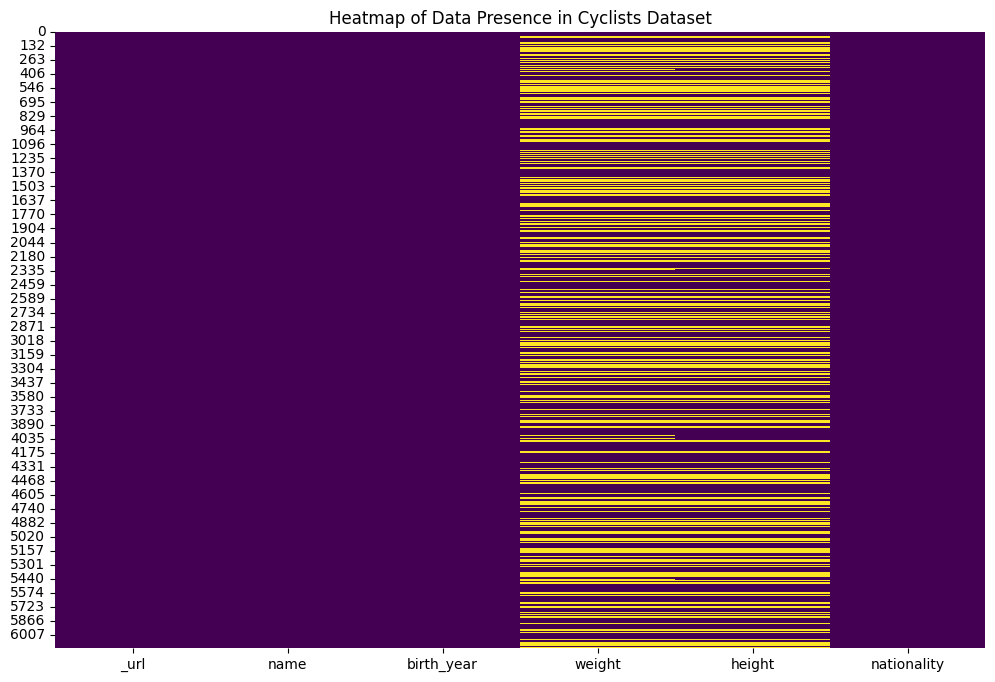

In [1749]:
# ---- heatmap of the presence of data in the cyclists_df dataset ----

plt.figure(figsize=(12, 8))
sns.heatmap(cyclists_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Data Presence in Cyclists Dataset')
plt.show()

Replace outlier values with NULL

In [1750]:
def replace_outliers_with_nan(df, column):
    if pd.api.types.is_numeric_dtype(df[column]):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)

# List of columns for which we want to replace outliers with NaN
columns_to_check = ['birth_year', 'weight', 'height', 'nationality', 'name', '_url']

for column in columns_to_check:
    replace_outliers_with_nan(cyclists_df, column)

print("Outliers replaced with NaN in the specified columns.")

Outliers replaced with NaN in the specified columns.


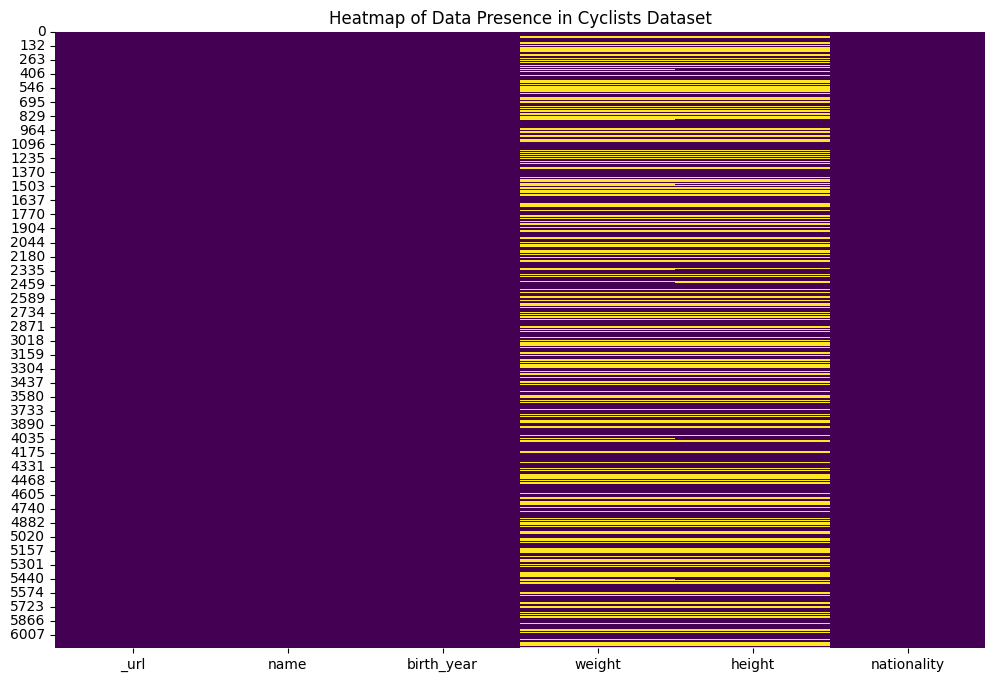

In [1751]:
# Visualize a heatmap of the presence of data in the cyclists_df dataset
plt.figure(figsize=(12, 8))
sns.heatmap(cyclists_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Data Presence in Cyclists Dataset')
plt.show()

### **0BS:** 
Since height and weight are correlated perhaps before discarding (so many nulls) we could try putting missing values of one where you have the other and see how many null values continue to remain 

Deletion of all rows with at least n null parameters. 

In [1752]:
x = 3 # Minimum number of non-NA values required to keep the row

initial_row_count = cyclists_df.shape[0]
# Drop rows with at least 'x' null values
cyclists_df= cyclists_df.dropna(thresh=cyclists_df.shape[1] - x + 1)
# Calculate the number of dropped rows
dropped_rows = initial_row_count - cyclists_df.shape[0]
print(f"Number of dropped rows: {dropped_rows}")


Number of dropped rows: 0


Deletion of all columns with at least n% null parameters. 

In [1753]:
n = 50  # Percentage threshold for null values

# Calculate the threshold for the number of null values
threshold = len(cyclists_df) * (n / 100)

# Drop columns with at least 'n%' null values
cyclists_df = cyclists_df.dropna(axis=1, thresh=threshold)

print(f"Remaining columns after dropping columns with at least {n}% null values:")
print(cyclists_df.columns)

Remaining columns after dropping columns with at least 50% null values:
Index(['_url', 'name', 'birth_year', 'weight', 'height', 'nationality'], dtype='object')


## **Races Dataset**

In [1754]:
races_df = pd.read_csv('../dataset/races.csv')

In [1755]:
races_df['points'].isnull().sum()

np.int64(477)

In [1756]:
races_df['uci_points'].isnull().sum()

np.int64(338779)

In [1757]:
missing_both = races_df[races_df['points'].isnull() & races_df['uci_points'].isnull()].shape[0]
print(f"Number of times both 'points' and 'uci_points' are missing: {missing_both}")

Number of times both 'points' and 'uci_points' are missing: 477


In [1758]:
races_df[races_df['points'].isnull()]['_url'].unique()

array(['vuelta-a-espana/1994/stage-5', 'tour-de-france/1986/stage-19',
       'tour-de-france/1988/prologue', 'tour-de-france/2019/stage-19'],
      dtype=object)

In [1759]:
races = ['vuelta-a-espana/1994/stage-5', 'tour-de-france/1986/stage-19',
       'tour-de-france/1988/prologue', 'tour-de-france/2019/stage-19']

for r in races:
    points = races_df[races_df['_url'] == r]['points'].unique()
    points_str = ', '.join(map(str, points))
    print(r + ': ' + points_str)

vuelta-a-espana/1994/stage-5: nan
tour-de-france/1986/stage-19: nan
tour-de-france/1988/prologue: nan
tour-de-france/2019/stage-19: nan


In [1760]:
races_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  float64
 3   uci_points           251086 non-null  float64
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  float64
 7   startlist_quality    589865 non-null  int64  
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac            589865 non-null  bool   
 14  is_cobbled           589865 non-null  bool   
 15  is_gravel        

In [1761]:
# Filter rows where both 'climb_total' and 'profile' are null
climb_total_and_profile_null = races_df[races_df['climb_total'].isnull() & races_df['profile'].isnull()]

# Display the filtered rows
climb_total_and_profile_null['_url'].nunique()

1955

In [1762]:
races_df

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
0,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,0,sean-kelly,22.0,True,False,False,vini-ricordi-pinarello-sidermec-1986,0.0
1,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,1,gerrie-knetemann,27.0,True,False,False,norway-1987,0.0
2,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,2,rene-bittinger,24.0,True,False,False,NaN,0.0
3,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,3,joseph-bruyere,30.0,True,False,False,navigare-blue-storm-1993,0.0
4,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,4,sven-ake-nilsson,27.0,True,False,False,spain-1991,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589860,giro-d-italia/2010/stage-1,Giro d'Italia,80.0,16.0,8400.0,60.0,1.0,878,NaN,2010-05-08 00:11:38,192,anders-lund-1,25.0,True,False,False,watney-avia-1972,80.0
589861,giro-d-italia/2010/stage-1,Giro d'Italia,80.0,16.0,8400.0,60.0,1.0,878,NaN,2010-05-08 00:11:40,193,andrea-masciarelli,28.0,True,False,False,NaN,82.0
589862,giro-d-italia/2010/stage-1,Giro d'Italia,80.0,16.0,8400.0,60.0,1.0,878,NaN,2010-05-08 00:11:41,194,marco-corti,24.0,True,False,False,kazakhstan-2001,83.0
589863,giro-d-italia/2010/stage-1,Giro d'Italia,80.0,16.0,8400.0,60.0,1.0,878,NaN,2010-05-08 00:11:48,195,robbie-mcewen,38.0,True,False,False,radio-popular-paredes-boavista-2023,90.0


all rows that have same '_url' and duplicate cycles are deleted 

In [1763]:
# Group by '_url' and filter out rows where 'cyclist' is duplicated within each group
initial_row_count = races_df.shape[0]
races_df = races_df[~races_df.duplicated(subset=['_url', 'cyclist'], keep=False)]

dropped_rows = initial_row_count - races_df.shape[0]
print(f"Number of dropped rows: {dropped_rows}")

Number of dropped rows: 249


'null' is put in place of any negative value for delta

In [1764]:
races_df['delta'] = races_df['delta'].apply(lambda x: np.nan if x < 0 else x)

/var/folders/n8/0xyp_8ms7sx0vdtw_lzp5dv00000gn/T/ipykernel_33539/3208373160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  races_df['delta'] = races_df['delta'].apply(lambda x: np.nan if x < 0 else x)


Drop columns 'is_cobred' and 'is_clmbed' as they are all false

In [1765]:
races_df = races_df.drop(columns=['is_gravel', 'is_cobbled'])
print(f"Remaining columns after dropping:")
print(races_df.columns)

Remaining columns after dropping:
Index(['_url', 'name', 'points', 'uci_points', 'length', 'climb_total',
       'profile', 'startlist_quality', 'average_temperature', 'date',
       'position', 'cyclist', 'cyclist_age', 'is_tarmac', 'cyclist_team',
       'delta'],
      dtype='object')


Drop race where cyclust are duplicate

In [1766]:
# Group by '_url' and filter out rows where 'cyclist' is duplicated within each group
initial_row_count = races_df.shape[0]
races_df = races_df[~races_df.duplicated(subset=['_url', 'cyclist'], keep=False)]

dropped_rows = initial_row_count - races_df.shape[0]
print(f"Remaining rows after removing duplicates within each '_url': {dropped_rows}")

Remaining rows after removing duplicates within each '_url': 0


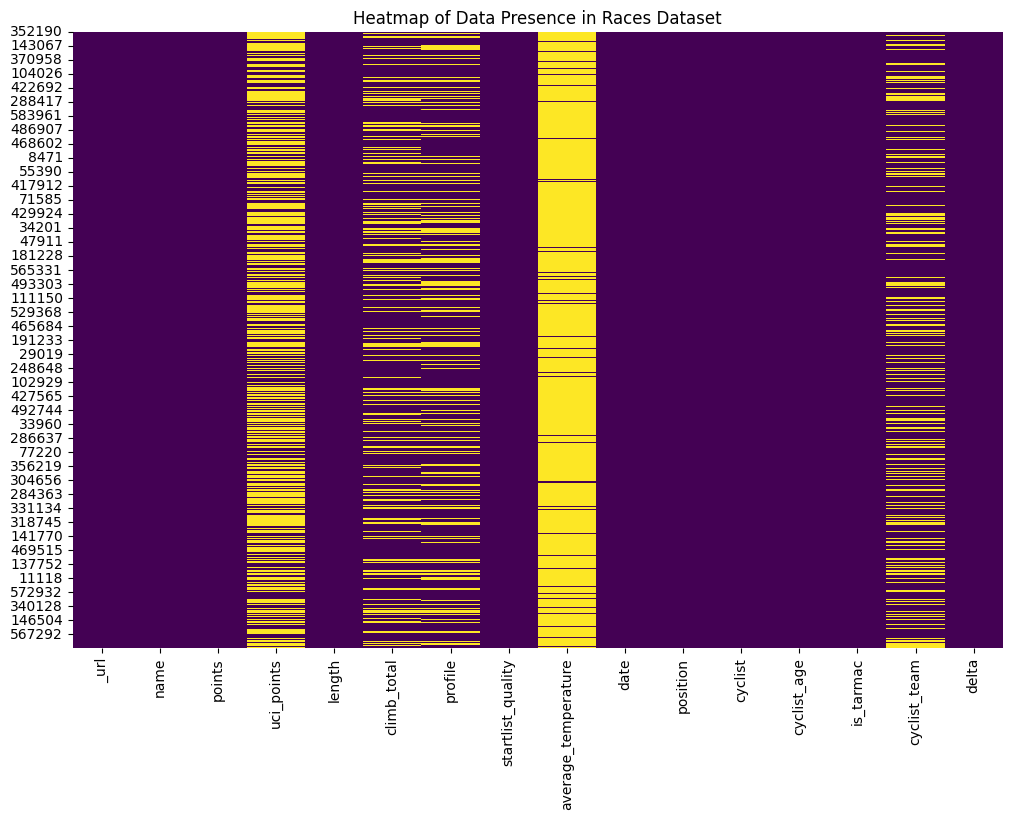

In [1767]:
# Visualize a heatmap of the presence of data in the races_df dataset
plt.figure(figsize=(12, 8))

# Sample a subset of the data to avoid memory issues
sampled_races_df = races_df.sample(frac=0.1, random_state=1)

sns.heatmap(sampled_races_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Data Presence in Races Dataset')
plt.show()

Replace outlier values with NULL

In [1768]:
def replace_outliers_with_nan(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)

# List of columns for which we want to replace outliers with NaN
columns_to_check = ['points', 'length', 'climb_total', 'profile', 'startlist_quality', 'cyclist_age', 'delta']

for column in columns_to_check:
    replace_outliers_with_nan(races_df, column)

print("Outliers replaced with NaN in the specified columns.")

Outliers replaced with NaN in the specified columns.


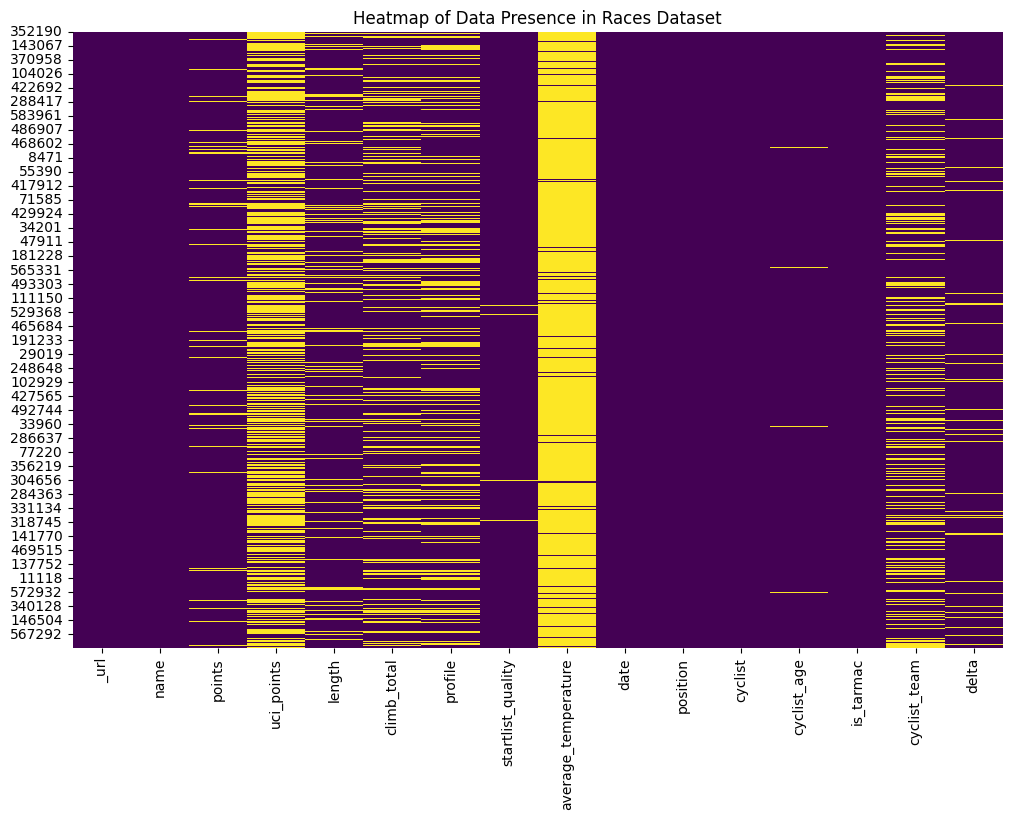

In [1769]:
# Visualize a heatmap of the presence of data in the races_df dataset
plt.figure(figsize=(12, 8))

# Sample a subset of the data to avoid memory issues
sampled_races_df = races_df.sample(frac=0.1, random_state=1)

sns.heatmap(sampled_races_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Data Presence in Races Dataset')
plt.show()

### **0BS:** 
Since prfile and climb_total are correlated perhaps before discarding (so many nulls) we could try putting missing values of one where you have the other and see how many null values continue to remain 

### **OBS:**
We should put null to all invalid delta values i.e. smaller than above with same url (cyclists arrived earlier with higher delta is impossible)

### **OBS:**
we should check the question of deltas and dates, if indeed all deltas can be derived from deltas (which seem to represent the duration of the race) then we can discard deltas. (deltas are the differences in the dates) 

### **OBS:**
There are many null value for uci_points but we know that uci_point and points (wich doesn't have many null value) are correlated so I think we can discard uci_point

Deletion of all rows with at least n null parameters. 

In [1770]:
x = 5 # Minimum number of non-NA values required to keep the row

initial_row_count = races_df.shape[0]
# Drop rows with at least 'x' null values
races_df = races_df.dropna(thresh=races_df.shape[1] - x + 1)
# Calculate the number of dropped rows
dropped_rows = initial_row_count - races_df.shape[0]
print(f"Number of dropped rows: {dropped_rows}")


Number of dropped rows: 76589


Deletion of all columns with at least n% null parameters. 

In [1771]:
n = 50  # Percentage threshold for null values

# Calculate the threshold for the number of null values
threshold = len(races_df) * (n / 100)

# Drop columns with at least 'n%' null values
races_df = races_df.dropna(axis=1, thresh=threshold)

print(f"Remaining columns after dropping columns with at least {n}% null values:")
print(races_df.columns)

Remaining columns after dropping columns with at least 50% null values:
Index(['_url', 'name', 'points', 'length', 'climb_total', 'profile',
       'startlist_quality', 'date', 'position', 'cyclist', 'cyclist_age',
       'is_tarmac', 'cyclist_team', 'delta'],
      dtype='object')
